# Import Data and Metadata

In [2]:
# import modules
import pandas as pd

In [3]:
# import data
df = pd.read_csv('dataframes/pos_df.csv')
df.sample(3)

,Sample Name,CAS9-A,CAS9-A.1,CAS9-B,CAS9-B.1,CAV_A,CAV_A.1,CAV_B,CAV_B.1,CAVIN_A,...,SPTLC_B,SPTLC_B.1,UGCG-A,UGCG-A.1,UGCG-B,UGCG-B.1,WT_A,WT_A.1,WT_B,WT_B.1
2499,PC 34:6 (PC),301.5063,666.7635,552.5125,641.2035,464.8316,544.0313,323.1531,393.1259,610.528,...,420.722,387.7429,414.6915,432.1241,565.2723,290.9028,761.8011,739.8615,538.9607,551.5136
1519,PE 44:9 (-PE),0.0000,22.0000,0.0000,32.0000,0.0000,0.0000,0.0000,0.0000,0.000,...,0.000,0.0000,0.0000,28.0000,37.0000,0.0000,0.0000,29.0000,22.0000,0.0000
2139,NAPE 40:5+NH4 (-FA 20:2 (NH4)),0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,...,0.000,0.0000,0.0000,0.0000,24.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [4]:
# import lipid metadata
df_meta = pd.read_csv('dataframes/pos_lipids_df_meta.csv')
df_meta.sample(3)

,Sample Name,Head Group,Acyl Chain Length,Unsaturation
1820,NAPE 40:1+NH4 (-FA 20:1 (NH4)),NAPE,40,1
820,GD3 36:3;2 (LCB 17:0;2-2H2O),GD3,36,3
2988,PG 48:1 (-PG (NH4)),PG,48,1


In [5]:
# import experiment metedata
df_exps = pd.read_csv('dataframes/pos_exps_df_meta.csv')
df_exps.sample(3)

,sample,protein
40,WT_B,WT
13,CERS2_mg-A.1,CERS2_mg
14,CERS2_mg-B,CERS2_mg


## Get Chain Lengths

We want to find the amounts of each chain length for each experiment

In [91]:
# merge with metadata to get chain lengths
dfa = df_meta[['Sample Name', 'Acyl Chain Length']].merge(df, on='Sample Name')

# find concentration of each chain length
lengths = dfa.groupby('Acyl Chain Length').sum()
lengths.head()

,CAS9-A,CAS9-A.1,CAS9-B,CAS9-B.1,CAV_A,CAV_A.1,CAV_B,CAV_B.1,CAVIN_A,CAVIN_A.1,...,SPTLC_B,SPTLC_B.1,UGCG-A,UGCG-A.1,UGCG-B,UGCG-B.1,WT_A,WT_A.1,WT_B,WT_B.1
Acyl Chain Length,,,,,,,,,,,,,,,,,,,,,
10,0.0000,0.0000,0.0000,0.0000,21.6224,0.0000,234.6340,276.7446,0.0000,22.0000,...,40.0000,53.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,23.0000
12,35.0000,35.0000,56.9083,33.0000,32.0000,44.6469,96.8573,106.0000,0.0000,30.0000,...,22.0000,0.0000,0.0000,30.0,49.0000,57.0000,0.0000,0.0000,37.0000,0.0000
14,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,15.4020,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
16,101.0000,54.0000,56.0000,28.0000,3514.0802,3209.3048,2387.5640,2308.1189,42.0000,73.0000,...,2501.8477,2379.0624,38.0000,69.0,23.0000,83.0000,0.0000,0.0000,0.0000,0.0000
18,3151.6889,3196.6663,3517.1031,3100.7914,9804.0135,6799.5276,4619.7055,4772.9836,3882.7404,3969.9773,...,2950.9891,3296.1865,3545.4834,3870.7,3903.5885,3691.8628,5067.7189,4964.1132,3803.6267,3579.8054


In [107]:
# get mean chain lengths for each protein
ptns = lengths.T.reset_index().rename(columns={'index': 'sample'}).merge(df_exps, on='sample')
ptns = ptns.groupby('protein').sum().T.reset_index().rename(columns={'index':'Acyl Chain Length'})
ptns = ptns.drop(columns=['RAJU'])

# get chain lengths as fraction of each sample (down the columns)
ptns.iloc[:,1:] = ptns.iloc[:,1:]/ptns.iloc[:,1:].sum()
ptns.head()

protein,Acyl Chain Length,CAS9,CAV,CAVIN,CERS2-1g,CERS2_mg,CERS5,Flot2,SPTLC,UGCG,WT
0,10,0.000000,0.000054,0.000002,0.000000,7.509147e-07,0.000000,0.000000,0.000035,0.000000,0.000002
1,12,0.000012,0.000028,0.000005,0.000010,0.000000e+00,0.000000,0.000002,0.000005,0.000014,0.000003
2,14,0.000000,0.000002,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
3,16,0.000017,0.001161,0.000025,0.000011,2.680576e-04,0.000547,0.000019,0.001047,0.000022,0.000000
4,18,0.000944,0.002642,0.001570,0.001876,1.442333e-03,0.002131,0.000573,0.001316,0.001583,0.001328


# Graph
We want to graph the distribution of chain lengths for each experiment

In [108]:
# import modules
import matplotlib.pyplot as plt
import altair as alt

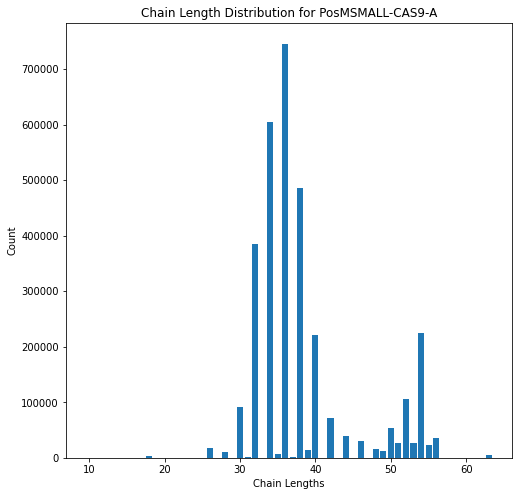

In [109]:
plt.figure(figsize=(8,8))
plt.bar(
    x=lengths.index,
    height=lengths.iloc[:,0]
)

plt.title('Chain Length Distribution for PosMSMALL-CAS9-A')
plt.xlabel('Chain Lengths')
plt.ylabel('Count')
plt.show()

In [110]:
# move 'Acyl Chain Length' from index into column so altair can access
l = lengths.reset_index()

a = alt.Chart(l).mark_bar(color='#008000', opacity=0.5).encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('CAS9-A:Q').title('Concentration')
).properties(
    title='CAS9-A'
)

b = alt.Chart(l).mark_bar(opacity=0.5).encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('CAV_A:Q').title('Concentration'),
).properties(
    title=('CAV_A')
)

c = alt.Chart(l).mark_bar(opacity=0.5).encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('CAVIN_A')
).properties(
    title='CAVIN_A'
)

a | b | c

alt.HConcatChart(...)

In [111]:
# get chain length distributions for CAS9
l_4 = l.iloc[:,:5].melt('Acyl Chain Length', var_name='exps')

In [112]:
alt.Chart(l_4).mark_bar().encode(
    x='Acyl Chain Length:O',
    xOffset='exps',
    y='value:Q',
    color='exps:N',
    tooltip=['Acyl Chain Length', 'exps', 'value']
).properties(
    width=600,
    height=400,
    title="Chain Length Distribution for CAS9"
)

alt.Chart(...)

In [113]:
# get chain length distributions across all proteins
ptns_long = ptns.melt('Acyl Chain Length', var_name='protein')

In [114]:
click = alt.selection_point(fields=['protein'])

grouped = alt.Chart(ptns_long).mark_bar().encode(
    x='Acyl Chain Length:O',
    xOffset='protein',
    y=alt.Y('value:Q').title('Fraction (mean)'),
    color= alt.condition(click, alt.Color('protein:N'), alt.value('lightgray')),
    tooltip=['Acyl Chain Length', 'protein', 'value']
).properties(
    width=3000,
    title="Average Chain Length Distributions"
).add_params(
    click
)

grouped

alt.Chart(...)

In [115]:
a = alt.Chart(ptns).mark_bar(color='#440154', opacity=0.5).encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('CAS9:Q').title('Fraction (mean)'),
    tooltip=['Acyl Chain Length', 'CAS9']
).properties(
    title='CAS9'
)

b = alt.Chart(ptns).mark_bar(color='#482173', opacity=0.5).encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('CAV:Q').title('Fraction (mean)'),
    tooltip=['Acyl Chain Length', 'CAV']
).properties(
    title='CAV'
)

c = alt.Chart(ptns).mark_bar(color='#433e85', opacity=0.5).encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('CAVIN:Q').title('Fraction (mean)'),
    tooltip=['Acyl Chain Length', 'CAVIN']
).properties(
    title='CAVIN'
)

d = alt.Chart(ptns).mark_bar(color='#38588c', opacity=0.5).encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('CERS2-1g:Q').title('Fraction (mean)'),
    tooltip=['Acyl Chain Length', 'CERS2-1g']
).properties(
    title='CERS2-1g'
)

e = alt.Chart(ptns).mark_bar(color='#2d708e', opacity=0.5).encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('CERS2_mg:Q').title('Fraction (mean)'),
    tooltip=['Acyl Chain Length', 'CERS2_mg']
).properties(
    title='CERS2_mg'
)

f = alt.Chart(ptns).mark_bar(color='#25858e', opacity=0.5).encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('CERS5:Q').title('Fraction (mean)'),
    tooltip=['Acyl Chain Length', 'CERS5']
).properties(
    title='CERS5'
)

g = alt.Chart(ptns).mark_bar(color='#1e9b8a', opacity=0.5).encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('Flot2:Q').title('Fraction (mean)'),
    tooltip=['Acyl Chain Length', 'Flot2']
).properties(
    title='Flot2'
)

i = alt.Chart(ptns).mark_bar(color='#52c569', opacity=0.5).encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('SPTLC:Q').title('Fraction (mean)'),
    tooltip=['Acyl Chain Length', 'SPTLC']
).properties(
    title='SPTLC'
)

j = alt.Chart(ptns).mark_bar(color='#86d549', opacity=0.5).encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('UGCG:Q').title('Fraction (mean)'),
    tooltip=['Acyl Chain Length', 'UGCG']
).properties(
    title='UGCG'
)

k = alt.Chart(ptns).mark_bar(color='#c2df23', opacity=0.5).encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('WT:Q').title('Fraction (mean)'),
    tooltip=['Acyl Chain Length', 'WT']
).properties(
    title='WT'
)

layered = a + b + c + d + e + f + g + i + j + k
layered

alt.LayerChart(...)

In [116]:
a = alt.Chart(ptns).mark_bar().encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('CAS9:Q').title('Fraction (mean)').scale(domain=[0,.26]),
    tooltip=['Acyl Chain Length', 'CAS9']
).properties(
    title='CAS9'
)

b = alt.Chart(ptns).mark_bar().encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('CAV:Q').title('Fraction (mean)').scale(domain=[0,.26]),
    tooltip=['Acyl Chain Length', 'CAV']
).properties(
    title='CAV'
)

c = alt.Chart(ptns).mark_bar().encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('CAVIN:Q').title('Fraction (mean)').scale(domain=[0,.26]),
    tooltip=['Acyl Chain Length', 'CAVIN']
).properties(
    title='CAVIN'
)

d = alt.Chart(ptns).mark_bar().encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('CERS2-1g:Q').title('Fraction (mean)').scale(domain=[0,.26]),
    tooltip=['Acyl Chain Length', 'CERS2-1g']
).properties(
    title='CERS2-1g'
)

e = alt.Chart(ptns).mark_bar().encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('CERS2_mg:Q').title('Fraction (mean)').scale(domain=[0,.26]),
    tooltip=['Acyl Chain Length', 'CERS2_mg']
).properties(
    title='CERS2_mg'
)

f = alt.Chart(ptns).mark_bar().encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('CERS5:Q').title('Fraction (mean)').scale(domain=[0,.26]),
    tooltip=['Acyl Chain Length', 'CERS5']
).properties(
    title='CERS5'
)

g = alt.Chart(ptns).mark_bar().encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('Flot2:Q').title('Fraction (mean)').scale(domain=[0,.26]),
    tooltip=['Acyl Chain Length', 'Flot2']
).properties(
    title='Flot2'
)

i = alt.Chart(ptns).mark_bar().encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('SPTLC:Q').title('Fraction (mean)').scale(domain=[0,.26]),
    tooltip=['Acyl Chain Length', 'SPTLC']
).properties(
    title='SPTLC'
)

j = alt.Chart(ptns).mark_bar().encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('UGCG:Q').title('Fraction (mean)').scale(domain=[0,.26]),
    tooltip=['Acyl Chain Length', 'UGCG']
).properties(
    title='UGCG'
)

k = alt.Chart(ptns).mark_bar().encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('WT:Q').title('Fraction (mean)').scale(domain=[0,.26]),
    tooltip=['Acyl Chain Length', 'WT']
).properties(
    title='WT'
)

chain_lengths = (a | b | c) & (d | e | f) & (g | i) & (j | k)
chain_lengths

alt.VConcatChart(...)

# Save Graphs

In [96]:
# chain_lengths.save('graphs/pos_mode_whole_dataset/ChainLengthByProtein_SideBySide_interactive.html')

# grouped.save('graphs/pos_mode_whole_dataset/ChainLengthByProtein_GroupedBarGraph_interactive.html')